In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time


In [2]:
# Importing csv into a dataframe
dataframe_df = pd.read_csv("Resources/Data_Clean_Cases.csv")
dataframe_df.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
dataframe_df["new_deaths"].sum()

4905123.0

In [4]:
len(dataframe_df["location"].unique())

186

In [5]:

death_plot=dataframe_df[["location", "new_deaths", "new_cases"]]
death_plot = death_plot.groupby("location").sum()
death_plot=death_plot.reset_index()
death_plot=death_plot.sort_values("new_deaths", ascending=False)
death_plot_30=death_plot.head(30)
death_plot


,location,new_deaths,new_cases
177,United States,731263.0,45218906.0
23,Brazil,604228.0,21530382.0
77,India,452811.0,34127450.0
109,Mexico,281075.0,3767758.0
138,Russia,222320.0,7969960.0
...,...,...,...
48,Dominica,30.0,4412.0
120,New Zealand,28.0,5316.0
140,Saint Kitts and Nevis,21.0,2589.0
19,Bhutan,3.0,2617.0


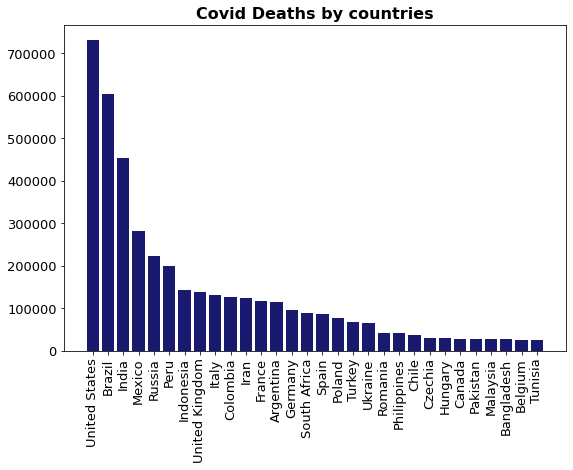

In [14]:
plt.figure(figsize = (9, 6))

plt.bar(death_plot_30["location"],
        death_plot_30["new_deaths"],
        color = "midnightblue")

plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)

plt.title("Covid Deaths by countries", fontsize = 16, fontweight = "bold")

plt.show()




No handles with labels found to put in legend.


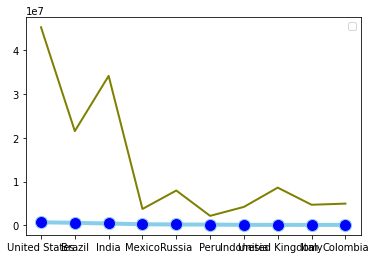

In [9]:
# libraries
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd
 
# Data
df=pd.DataFrame({'x_values': range(1,11), 'new_deaths': np.random.randn(10), 'new_cases': np.random.randn(10)+range(1,11)})
death_plot_filtered = death_plot.head(10)

# multiple line plots
plt.plot( death_plot_filtered["location"], death_plot_filtered["new_deaths"], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( death_plot_filtered["location"], death_plot_filtered["new_cases"], marker='', color='olive', linewidth=2)

# show legend
plt.legend()

# show graph
plt.show()


In [10]:
df


,x_values,new_deaths,new_cases
0,1,0.361160,1.853967
1,2,0.024502,2.354768
2,3,-0.255068,2.866858
3,4,-1.079761,3.851175
4,5,-1.546793,3.923671
5,6,1.572561,7.100567
6,7,-0.915741,7.338286
7,8,-0.022527,7.971103
8,9,-1.867600,8.741185
9,10,-1.716320,7.578307


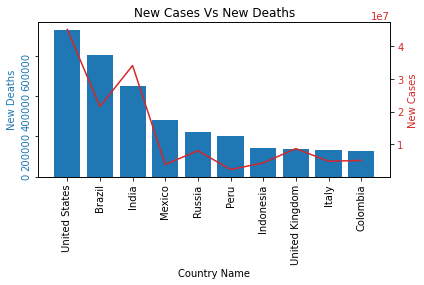

In [11]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Country Name')
ax1.tick_params(rotation = 90)
ax1.set_ylabel('New Deaths', color=color)
ax1.bar(death_plot_filtered['location'], death_plot_filtered['new_deaths'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('New Cases', color=color)  # we already handled the x-label with ax1
ax2.plot(death_plot_filtered['location'],death_plot_filtered['new_cases'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('New Cases Vs New Deaths')
plt.show()


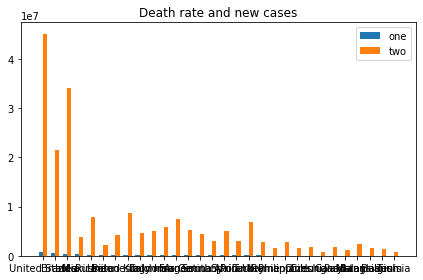

In [15]:

labels = death_plot_30["location"]
one = death_plot_30["new_deaths"]
two = death_plot_30["new_cases"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, one, width, label='one')
rects2 = ax.bar(x + width/2, two, width, label='two')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
ax.set_title('Death rate and new cases')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

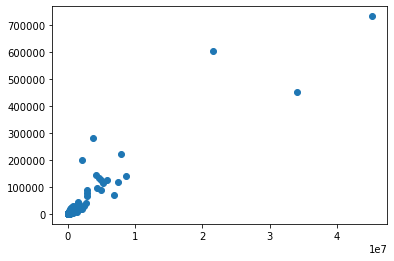

In [16]:
plt.scatter(x=death_plot["new_cases"], y=death_plot["new_deaths"])